In [1]:
import sys
sys.path.insert(1, 'utils')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

from sample import sample
from dirichlet_symmetric import get_dirichlet_symmetric_rmse
from rhat import calc_rhat_mixed_chains
from ess import get_ess_leapfrog_ratio

# Sampling

In [3]:
parameters = [{'alpha':[1]*10, 'N':10}]
transforms = ['stickbreaking', 'softmax']
transform_category='simplex'
evaluating_model='dirichlet_symmetric'

idata = sample(transform_category=transform_category, transform=transforms[0], 
    evaluating_model=evaluating_model, parameters=parameters, output_file=None, 
    auto_eval_all_params=False, n_iter = 1000, n_chains = 4, n_repeat = 1, 
                       show_progress = True, resample=False)

az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y[0],-0.488,1.300,-2.900,1.678,0.021,0.021,5038.0,2614.0,1.0
y[1],-0.536,1.366,-3.000,1.742,0.026,0.027,4101.0,1835.0,1.0
y[2],-0.492,1.312,-3.242,1.555,0.025,0.029,4493.0,1836.0,1.0
y[3],-0.540,1.422,-3.170,1.954,0.026,0.028,4688.0,1943.0,1.0
y[4],-0.439,1.348,-2.956,1.805,0.021,0.022,5614.0,2516.0,1.0
y[5],-0.486,1.437,-3.365,1.858,0.022,0.025,5535.0,2436.0,1.0
y[6],-0.410,1.417,-3.061,2.131,0.022,0.025,5274.0,2195.0,1.0
y[7],-0.276,1.470,-3.208,2.169,0.022,0.024,5199.0,2770.0,1.0
y[8],0.073,1.786,-3.712,3.285,0.024,0.030,5758.0,2326.0,1.0
x[0],0.101,0.091,0.000,0.270,0.001,0.001,5038.0,2614.0,1.0


# R-hat for mixed chains

In [ ]:
path_1 = 'stan_models/softmax_dirichlet_symmetric.stan'
path_2 = 'stan_models/stickbreaking_dirichlet_symmetric.stan'

variable='x'
data={'alpha':[1]*10, 'N':10}

In [4]:
calc_rhat_mixed_chains(path_1, path_2, variable, data, force_compile=False)

1.0001826208802025

# RMSE Plot

In [ ]:
%matplotlib inline
parameters = [{'alpha':[1]*100, 'N':100}]
transforms = ['stickbreaking', 'softmax']
transform_category='simplex'
evaluating_model='dirichlet_symmetric'

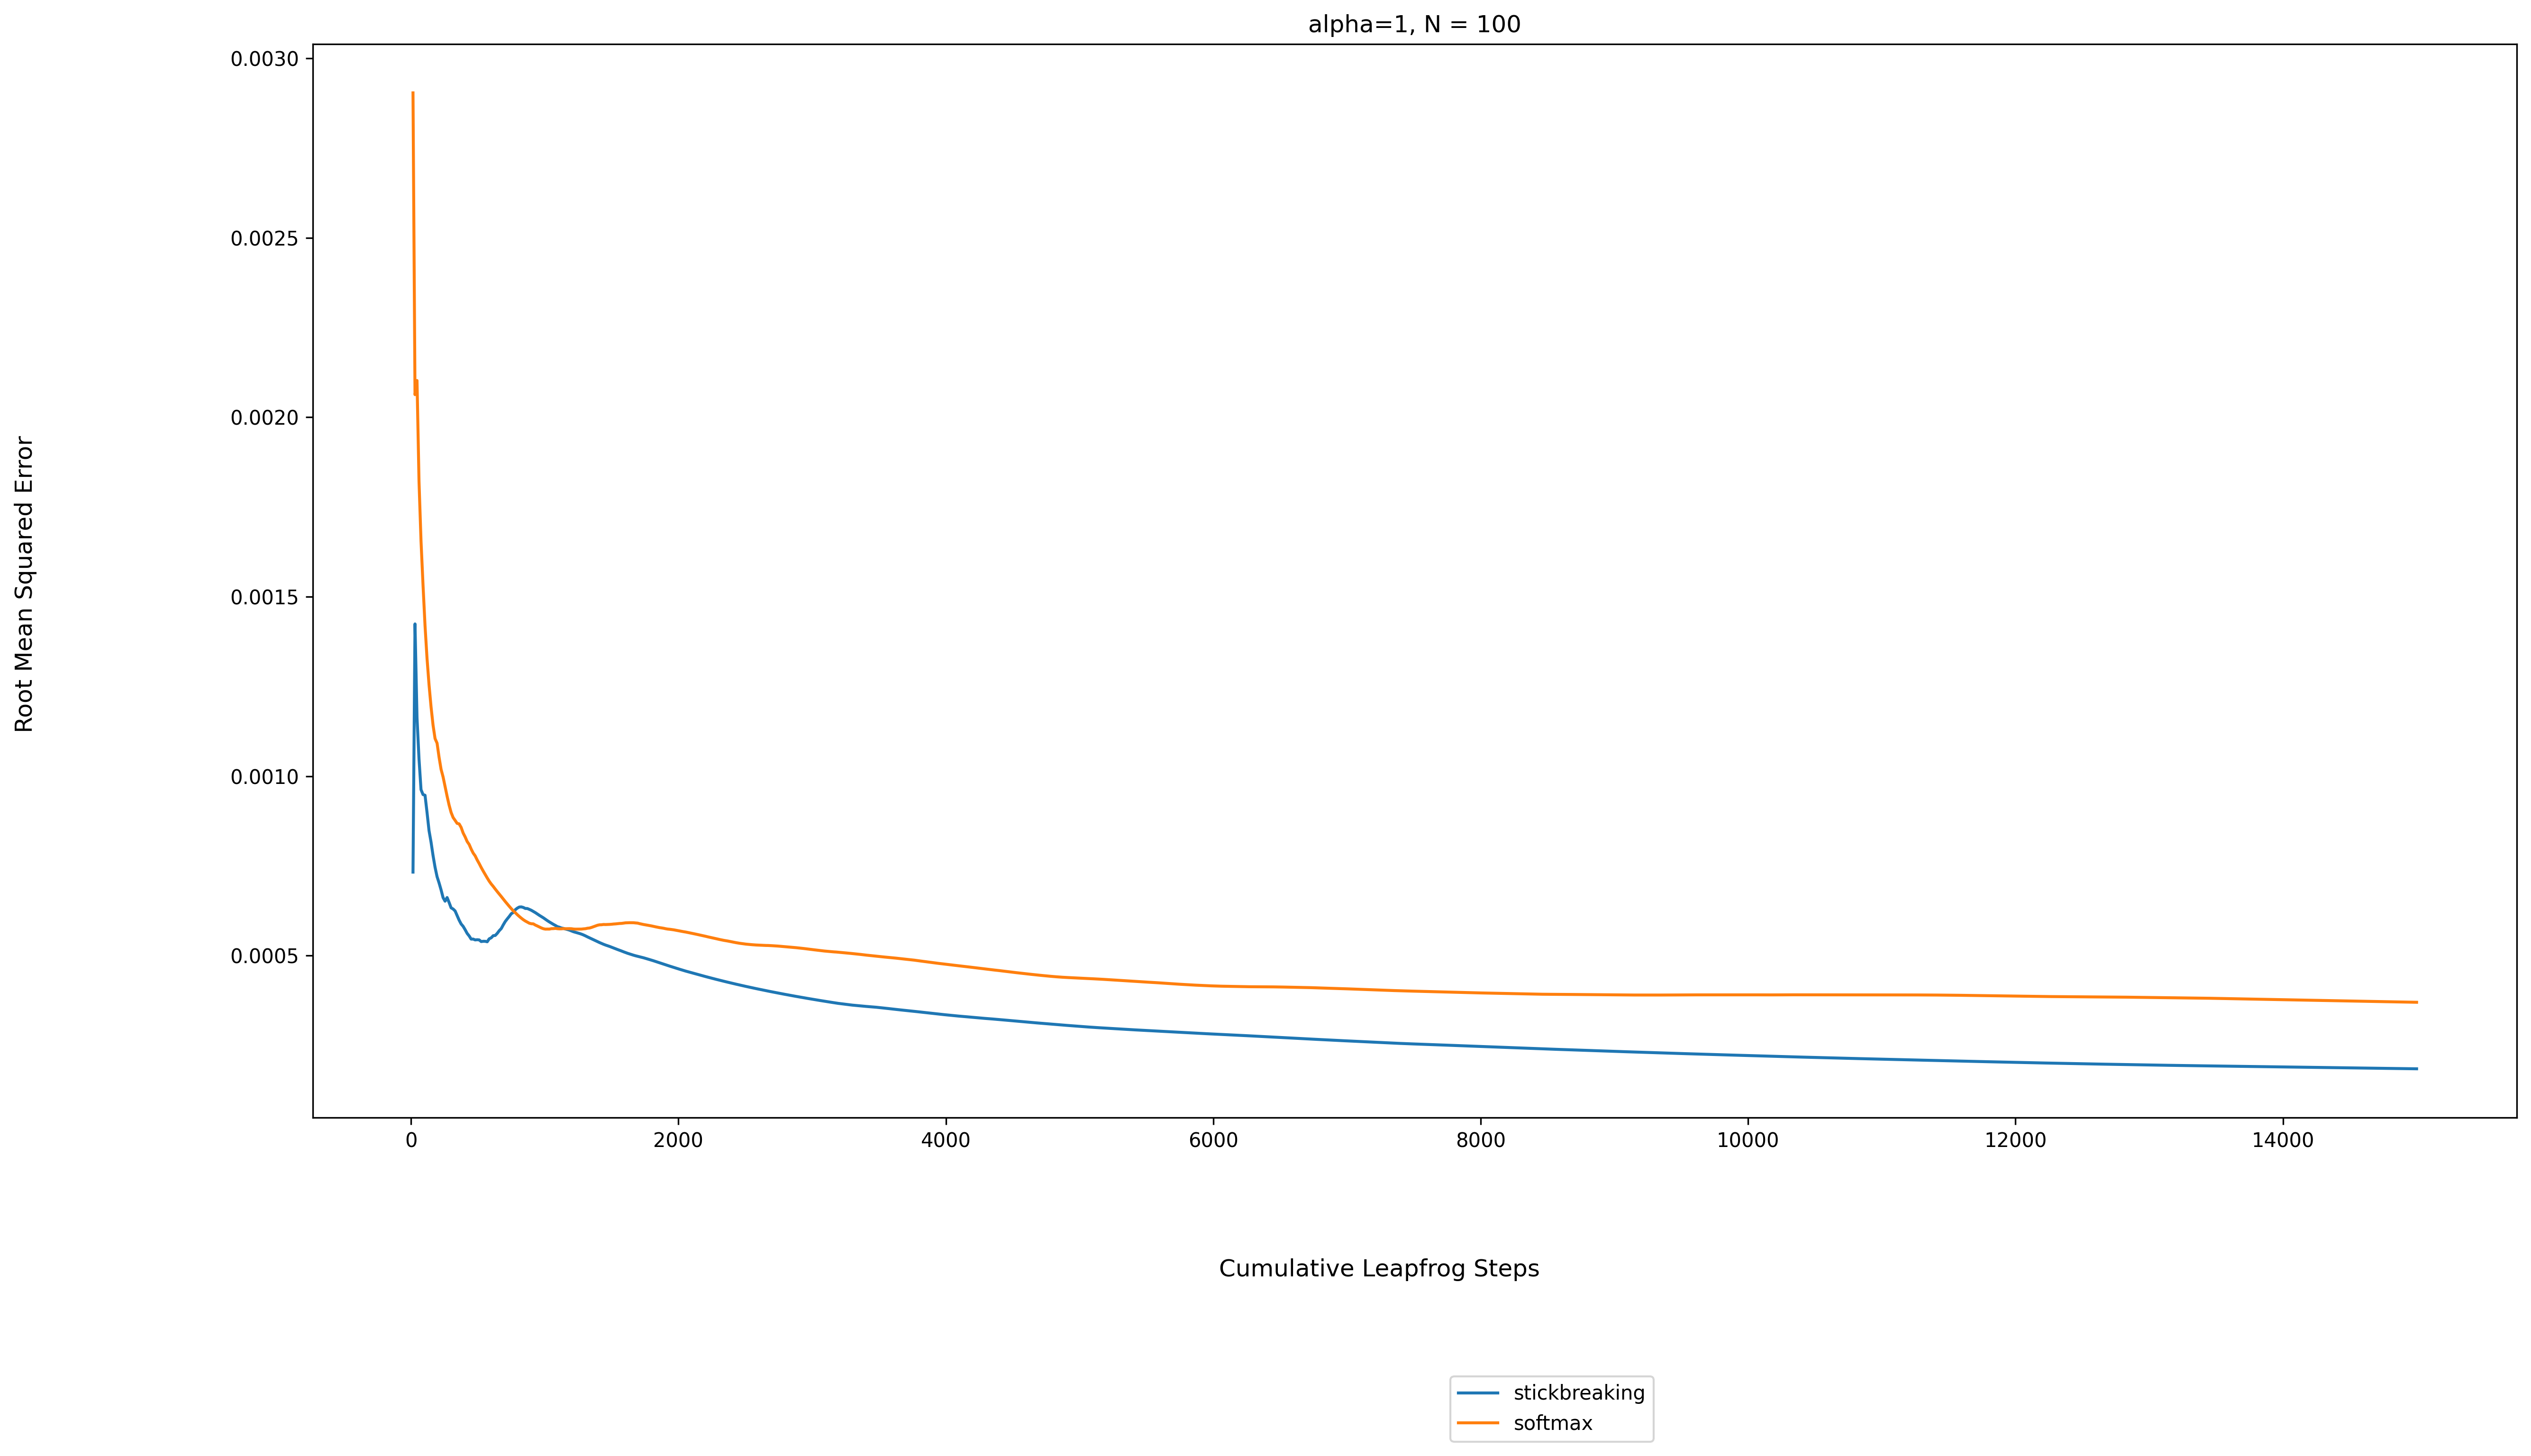

In [5]:
get_dirichlet_symmetric_rmse(transforms, transform_category, 
                             parameters, fig_name='rmse_example.png')

# ESS Plot

In [ ]:
parameters = [{'alpha':[1]*10, 'N':10}]
transforms = ['stickbreaking', 'softmax']
transform_category='simplex'
evaluating_model='dirichlet_symmetric'

var_name='x'
var_dim=0

### matplotlib

100%|█████████████████████████████████████████| 100/100 [00:33<00:00,  2.97it/s]


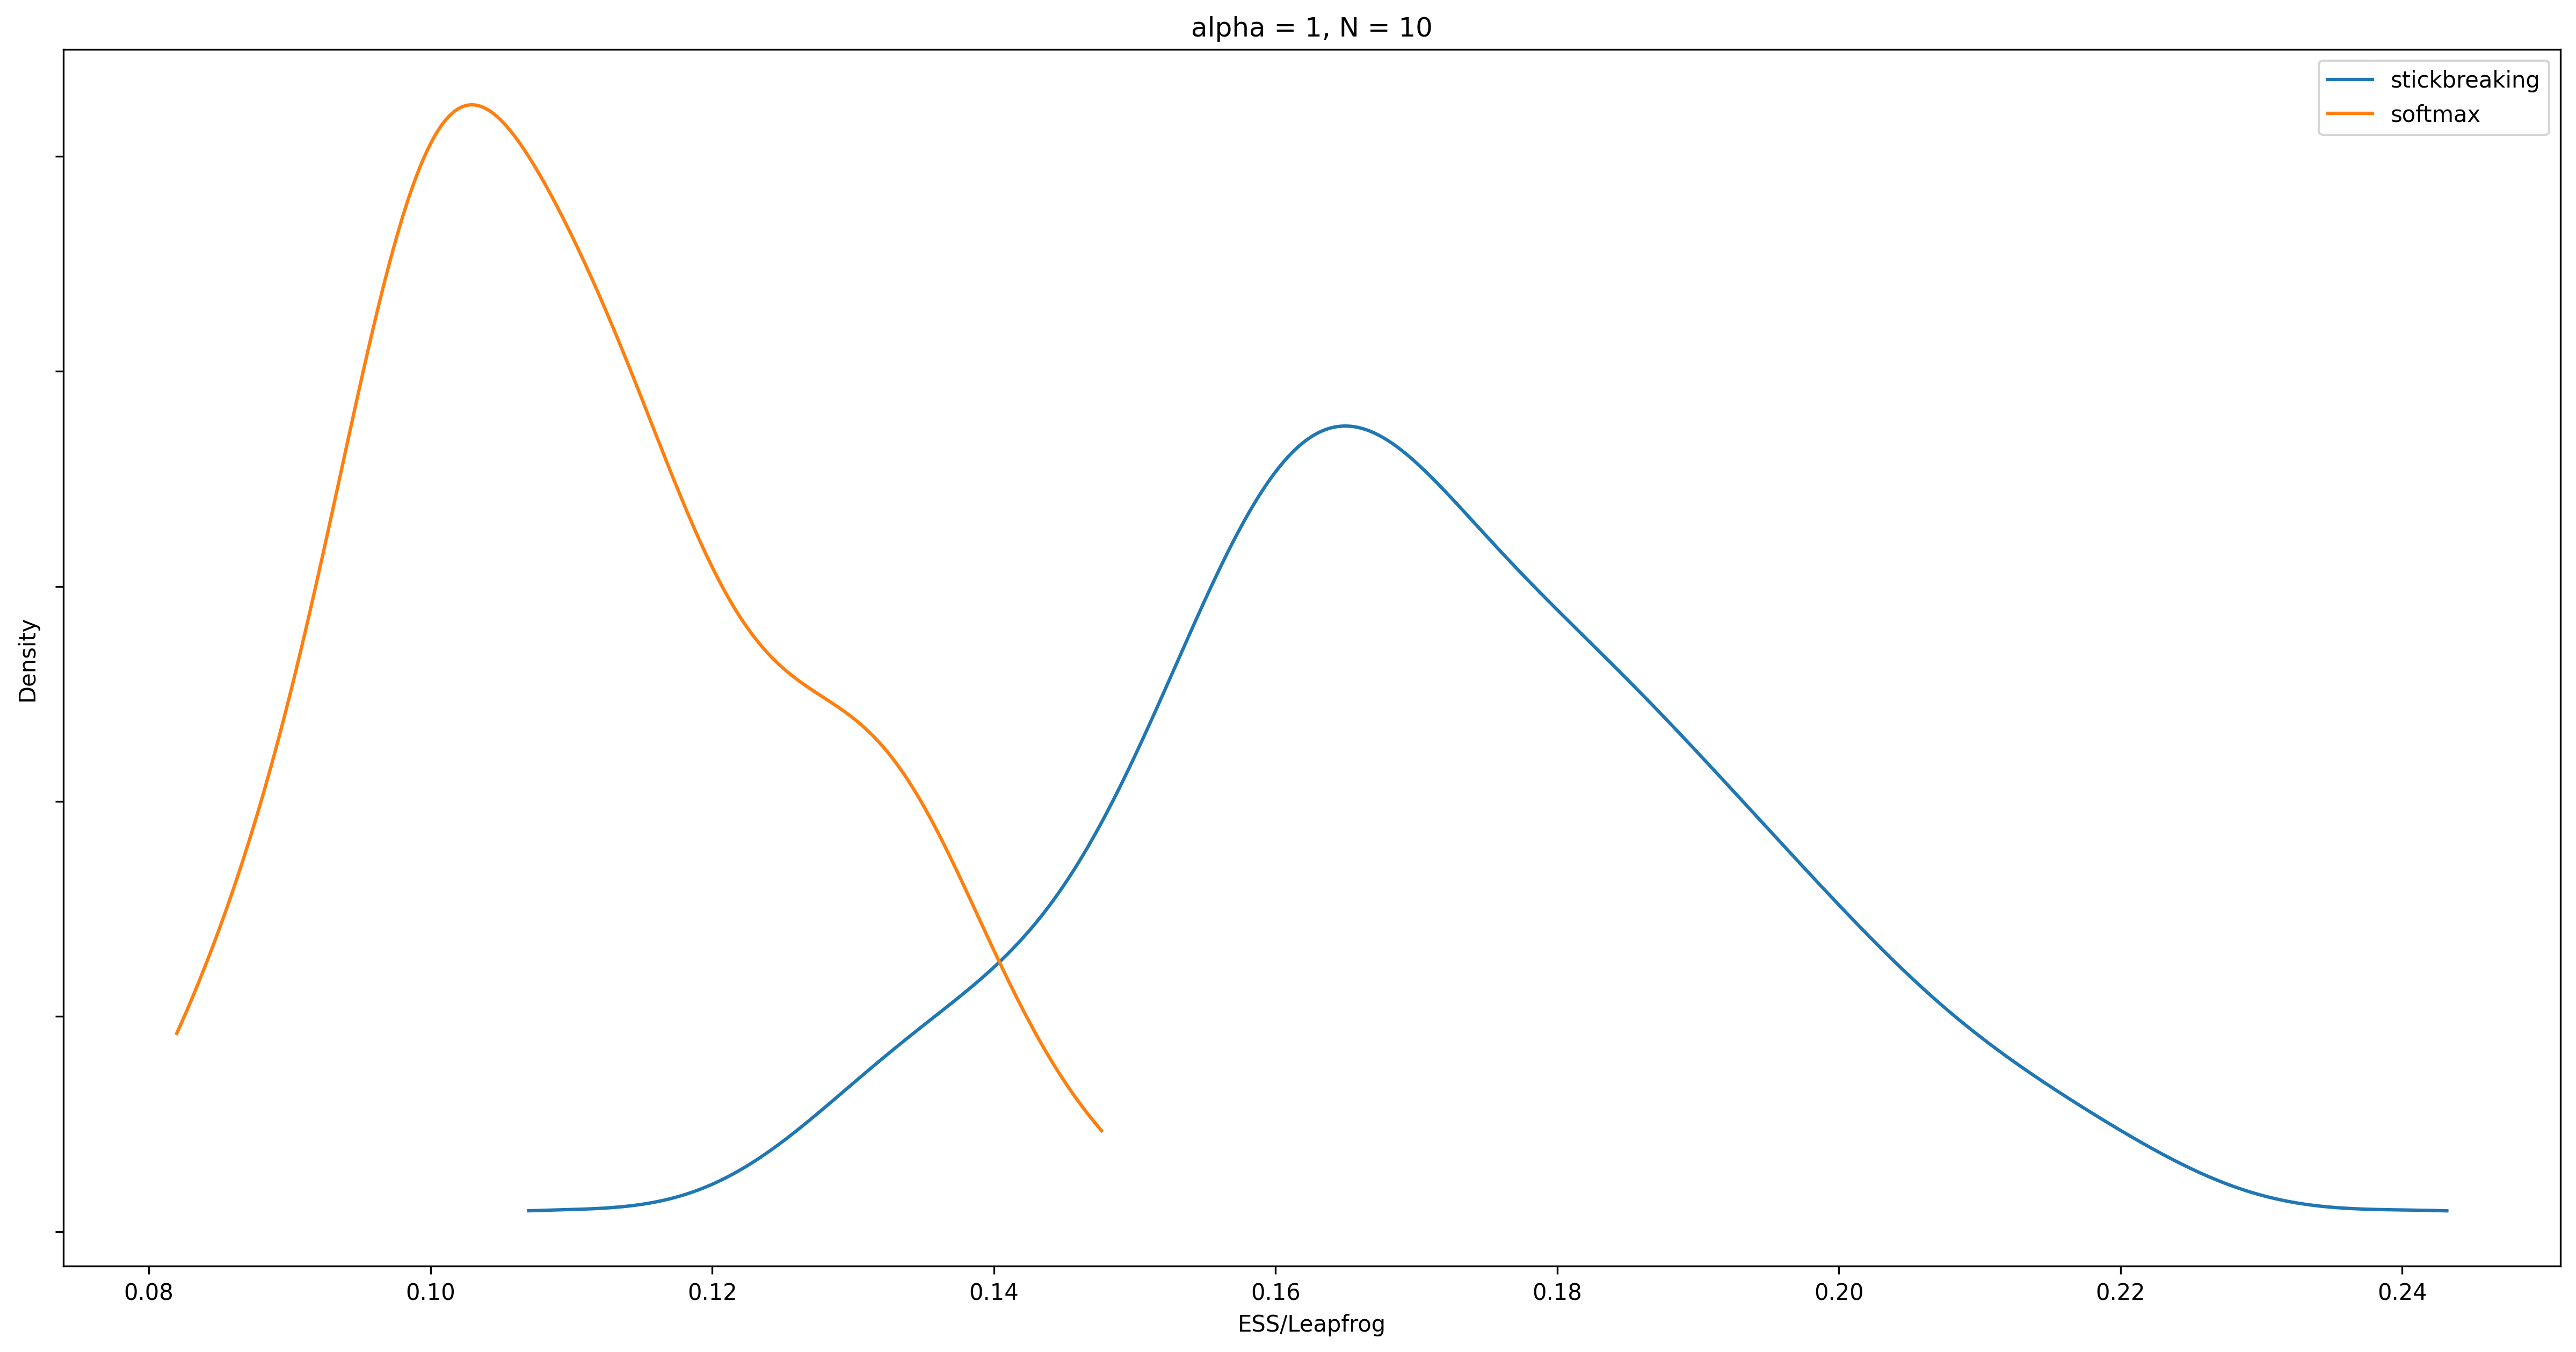

In [6]:
fig, axes = plt.subplots(len(parameters))
for ax, params in zip(axes.flatten() if len(parameters)>1 else [axes],  parameters):
    for transform in transforms:
        x, y = get_ess_leapfrog_ratio(transform_category, transform, evaluating_model, params, var_name, var_dim, repeat=100)
        ax.plot(x,y, label=transform)
ax.set_title('alpha = 1, N = 10')
ax.axes.yaxis.set_ticklabels([])
plt.xlabel('ESS/Leapfrog')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/ess_matplotlib_example.png', dpi=300)
plt.show()

### arviz

100%|█████████████████████████████████████████| 100/100 [00:38<00:00,  2.57it/s]


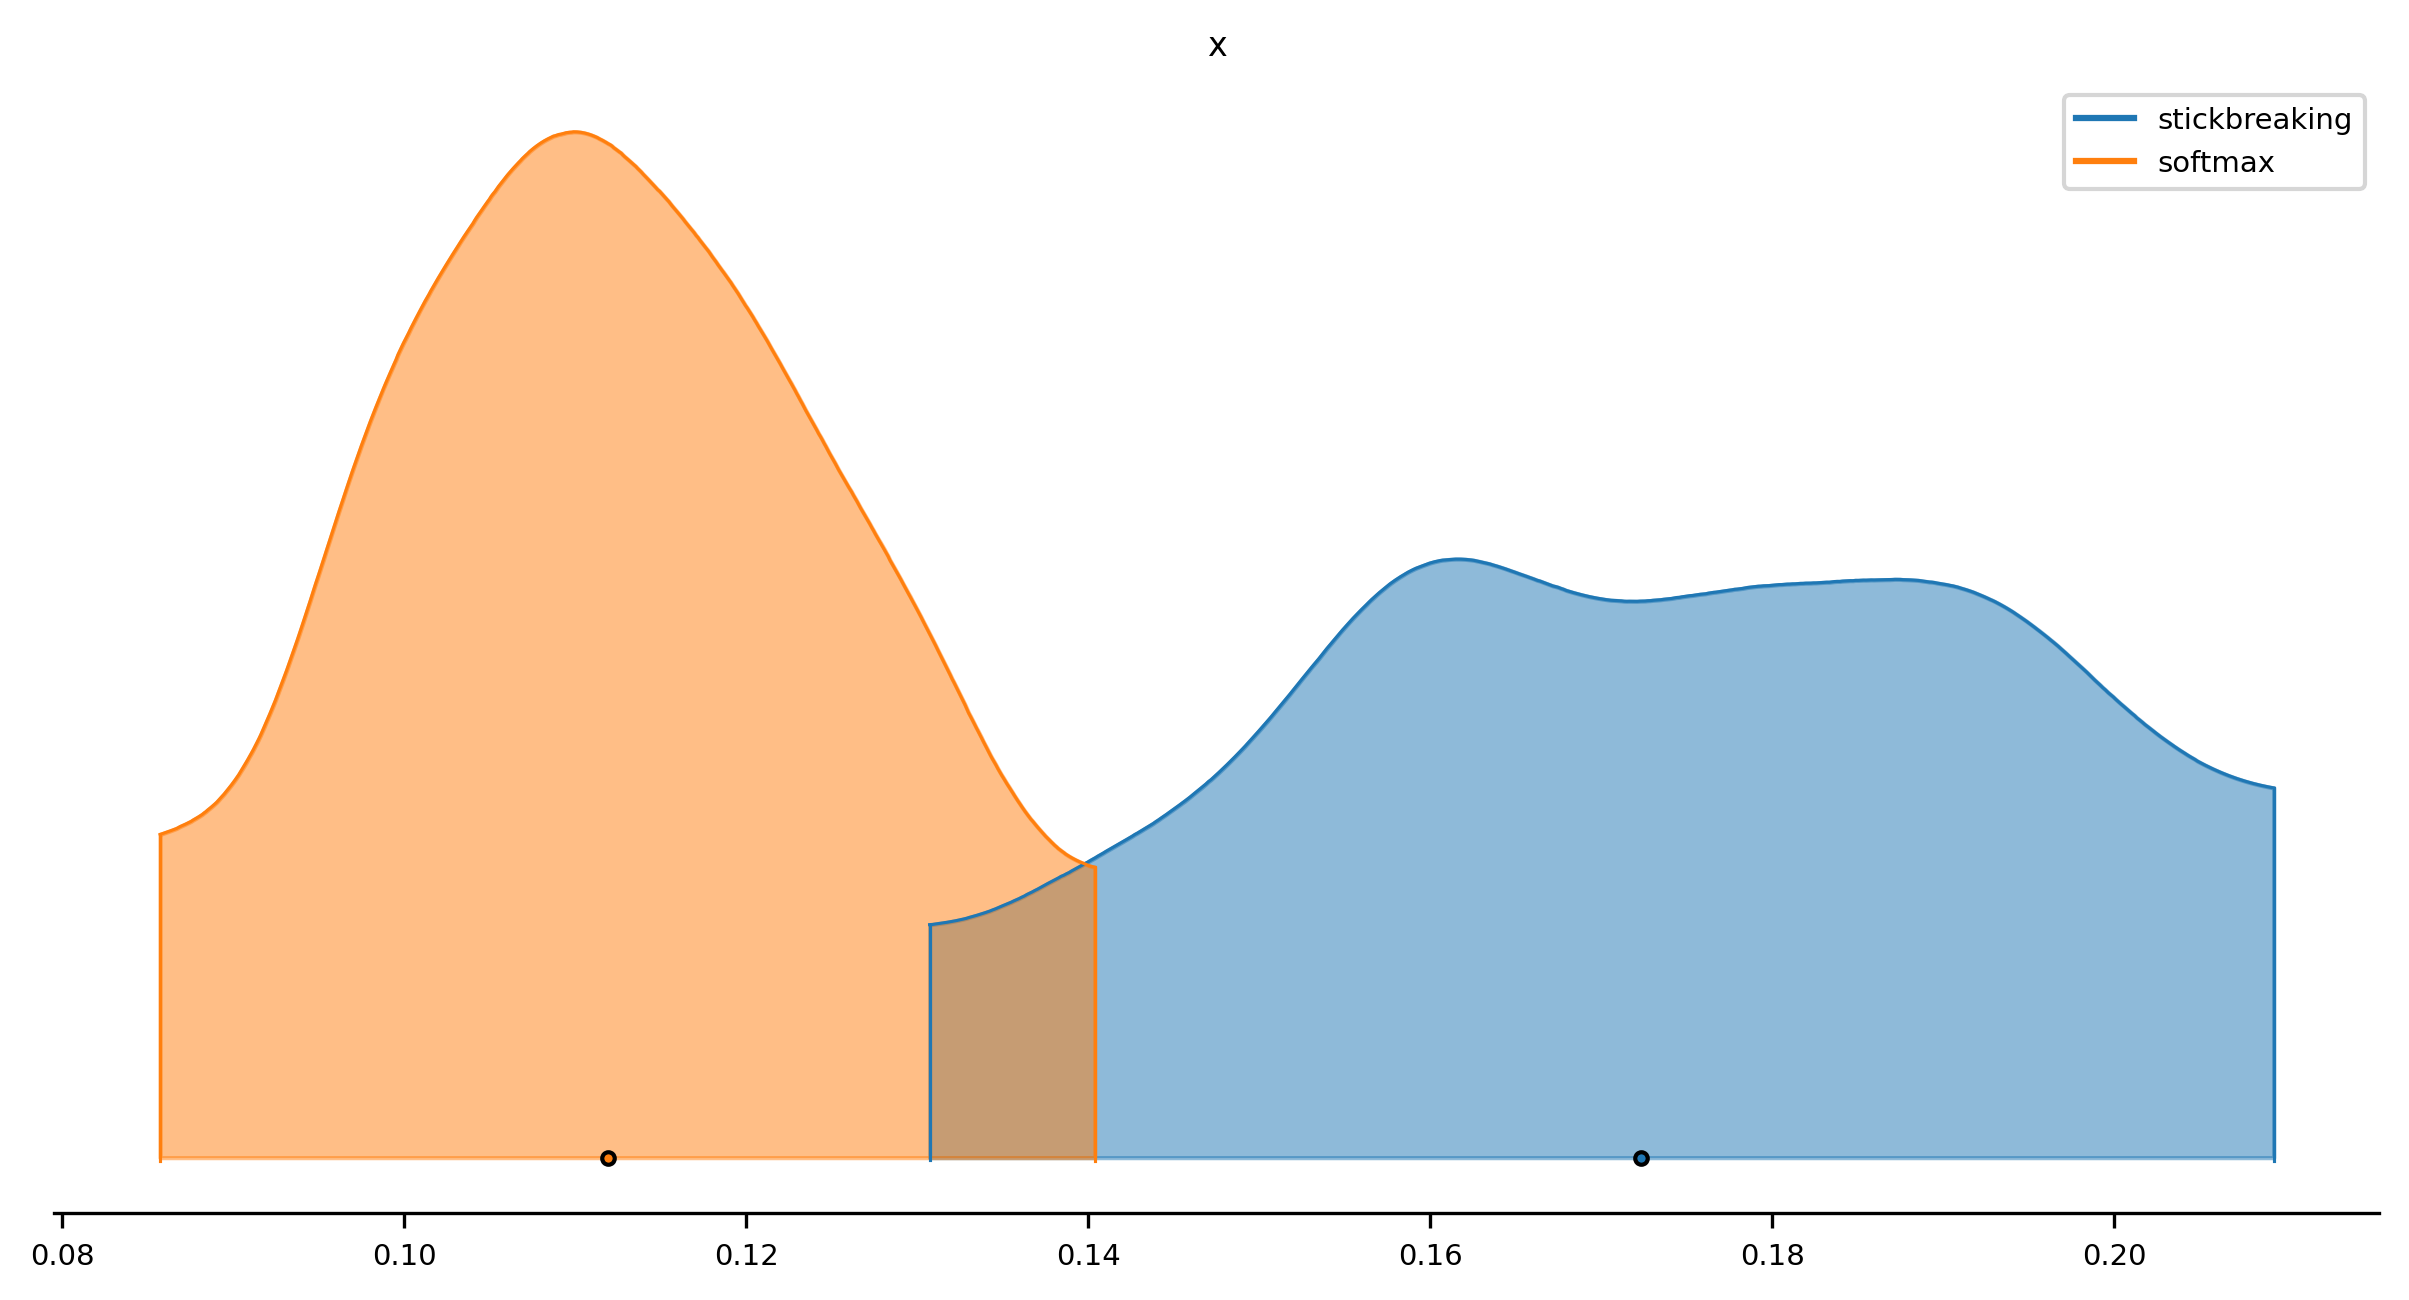

In [7]:
for params in parameters:
    idata_list=[]
    for transform in transforms:
        idata = get_ess_leapfrog_ratio(transform_category, transform, 
                evaluating_model, params, var_name, var_dim, repeat=100, return_ess=True)
        idata_list.append(az.convert_to_inference_data(np.asarray(idata)))

    az.plot_density(idata_list, shade=0.5, figsize=(10,5),hdi_prob=0.96, 
                data_labels=transforms);
plt.savefig('figures/ess_arviz_example.png', dpi=300)